In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sea
import math
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/data-science-job-salaries/ds_salaries.csv


In [2]:
# Data is reading helping with the Pandas libray in this stage.
df = pd.read_csv("../input/data-science-job-salaries/ds_salaries.csv")

# Unneccesary columns are dropped from the dataframe
df = df.drop(["Unnamed: 0"], axis = 1)

# To quick check of the data we can use the .head() function to see first 10 rows.

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
# To check the datatypes of columns, as we can see, data has not any null-value.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [4]:
# Before the start the analysis, we can check the all unique values of columns. It can be helped us to visualize data as much as easily.
df.nunique()
df["job_title"].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [5]:
# Statistical values of numerical columns can be check here. This way we can figure out the outliers according to statictical values.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


In [6]:
# Correlation between the numerical columns can be seen below.
df.corr().T

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.087577,0.170493,0.076314
salary,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.076314,-0.014608,0.132122,1.000000


In [7]:
# Double check for the null-values
df.isnull().sum()

# As we can see, all variables have not null values. 

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

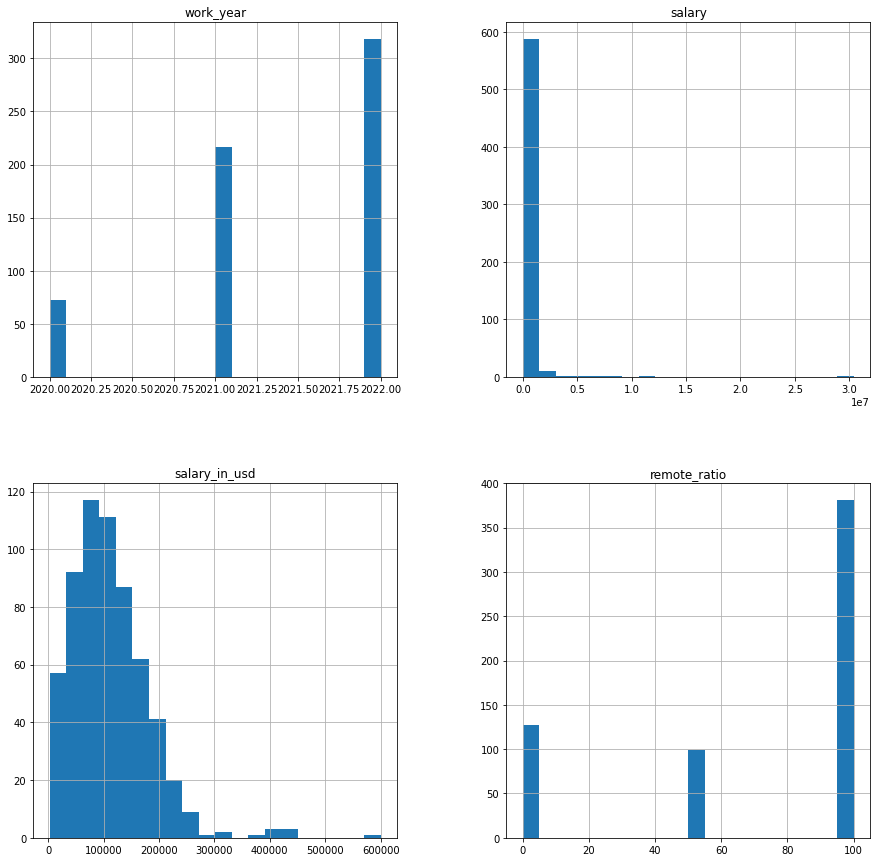

In [8]:
# Lets see the general distrubition of the numerical variables

axList = df.hist(bins=20, figsize = (15, 15))
plt.savefig("Hist.png")

In [9]:
x = df["job_title"].unique()
df2 = pd.DataFrame(x, columns = ['Job_Title'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Job_Title  50 non-null     object
dtypes: object(1)
memory usage: 528.0+ bytes


In [10]:
df["job_title"].value_counts()

total_job_title = []
for x in df2["Job_Title"]:
    a = (df.job_title == x).sum()
    total_job_title.append(a)
total_job_title = pd.DataFrame(total_job_title, columns = ["Total_Job_Title"])
total_job_title   

df3 = df2.assign(Total=total_job_title)
df3

df3 = df3.sort_values(
    by="Total",
    ascending=False
)

In [11]:
# Lets check the customer age distribution with the Gender
fig = px.bar(df3, x='Job_Title', y='Total')
fig.show()

In [12]:
job_list = ["Data Scientist", "Data Analyst","Data Engineer", "Machine Learning Engineer"]
df_filtered = df[df['job_title'].isin(job_list)]
df_filtered = df_filtered.reset_index(drop=True)

fig = px.histogram(df_filtered, x="job_title", title = "Customer Age Distribution",color="experience_level")
fig.update_layout(bargap=0.2)
fig.show()

In [13]:
average = []
max_salary = []
min_salary = []
for each in job_list:
    
    mean_value= int(df[(df.job_title == each)].salary_in_usd.mean())
    max_value= df[(df.job_title == each)].salary_in_usd.max()
    min_value= df[(df.job_title == each)].salary_in_usd.min()
    average.append(mean_value)
    max_salary.append(max_value)
    min_salary.append(min_value)

average = pd.DataFrame(average, columns = ["Average_Salary"])
max_salary = pd.DataFrame(max_salary, columns = ["Max_Salary"])
min_salary = pd.DataFrame(min_salary, columns = ["Min_Salary"])
job_title = pd.DataFrame(job_list, columns = ["Job_Title"])   

job_title = job_title.assign(Average=average, Max_Salary = max_salary, Min_Salary = min_salary)
job_title

job_title = job_title.sort_values(
    by="Average",
    ascending=False
)

fig = px.bar(job_title, x='Job_Title', y='Average')
fig.show()


In [14]:
import plotly.graph_objects as go
job_title

fig = go.Figure(data=[
    go.Bar(name='Average', x=job_title["Job_Title"], y=job_title["Average"]),
    go.Bar(name='Max_Salary', x=job_title["Job_Title"], y=job_title["Max_Salary"]),
    go.Bar(name='Min_Salary', x=job_title["Job_Title"], y=job_title["Min_Salary"])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()
